In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file, exact_m
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))


## Determine $T_c^*(\chi)$

In [18]:
chis = [4, 8, 12]
result = Results(varying_param= "chi", range=chis)
params = ModelParameters(T_range=(T_c, 2.285), step=0.0001, tol=1e-10, max_steps=int(10e9), use_prev=True)
result.get(params)

chi=4: 100%|██████████| 159/159 [08:37<00:00,  3.25s/it]


Saving data in folder: '07-05 18:00'
Done 



chi=8: 100%|██████████| 159/159 [07:47<00:00,  2.94s/it] 


Saving data in folder: '07-05 18:00'
Done 



chi=12: 100%|██████████| 159/159 [14:24<00:00,  5.44s/it]  

Saving data in folder: '07-05 18:00'
Done 



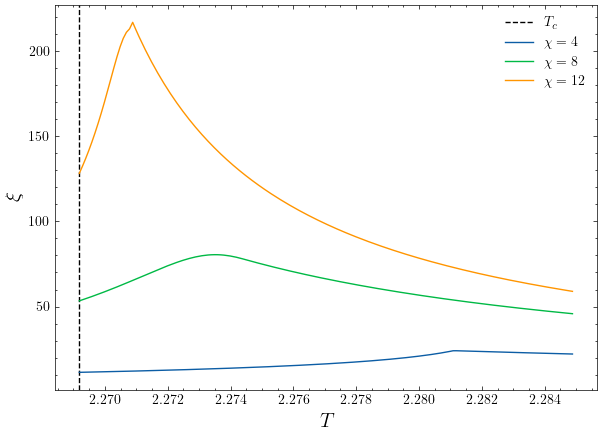

In [19]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2.23, 2.3)
for chi in [4, 8, 12]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.xi, folder="07-05 18:00")
    line.set_label(rf"$\chi = {chi}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi$", fontsize=15)
plt.show()

In [3]:
chis = [4, 8, 12]
T_stars = []
for chi in chis:
    data = read("07-05 18:00", f"chi{chi}")
    xis = compute(Prop.xi, data)
    T_star = data["temperatures"][xis.index(max(xis))]
    T_stars.append(T_star)

T_stars_chi = list(zip(chis, T_stars))
T_stars_chi

[(4, 2.2811853142130474), (8, 2.273485314213031), (12, 2.2708853142130256)]

## Determine optimal tolerance

In [4]:
tols = [10**-(power) for power in np.arange(5, 9, 0.5)]
result = Results(varying_param= "tol", range=tols)
params = ModelParameters(step=0.0001, max_steps=int(10e9), count=50)

for chi, T_star in T_stars_chi:
    params.chi = chi
    params.T_range = [T_star]
    result.get(params)

tol=1e-05: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving data in folder: '07-05 20:46'
Done 



tol=3.162277660168379e-06: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Saving data in folder: '07-05 20:46'
Done 



tol=1e-06: 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]


Saving data in folder: '07-05 20:46'
Done 



tol=3.162277660168379e-07: 100%|██████████| 1/1 [00:08<00:00,  8.80s/it]


Saving data in folder: '07-05 20:46'
Done 



tol=1e-07: 100%|██████████| 1/1 [00:07<00:00,  7.03s/it]


Saving data in folder: '07-05 20:46'
Done 



tol=3.162277660168379e-08: 100%|██████████| 1/1 [00:20<00:00, 20.16s/it]


Saving data in folder: '07-05 20:46'
Done 



tol=1e-08: 100%|██████████| 1/1 [00:27<00:00, 27.25s/it]


Saving data in folder: '07-05 20:46'
Done 



tol=3.1622776601683795e-09: 100%|██████████| 1/1 [00:34<00:00, 34.71s/it]


Saving data in folder: '07-05 20:46'
Done 



tol=1e-05: 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=3.162277660168379e-06: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=1e-06: 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=3.162277660168379e-07: 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=1e-07: 100%|██████████| 1/1 [00:05<00:00,  5.49s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=3.162277660168379e-08: 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=1e-08: 100%|██████████| 1/1 [00:07<00:00,  7.43s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=3.1622776601683795e-09: 100%|██████████| 1/1 [00:06<00:00,  6.55s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=1e-05: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=3.162277660168379e-06: 100%|██████████| 1/1 [00:07<00:00,  7.62s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=1e-06: 100%|██████████| 1/1 [00:12<00:00, 12.47s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=3.162277660168379e-07: 100%|██████████| 1/1 [00:22<00:00, 22.84s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=1e-07: 100%|██████████| 1/1 [00:41<00:00, 41.59s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=3.162277660168379e-08: 100%|██████████| 1/1 [00:42<00:00, 42.11s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=1e-08: 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Saving data in folder: '07-05 20:48'
Done 



tol=3.1622776601683795e-09: 100%|██████████| 1/1 [04:57<00:00, 297.67s/it]

Saving data in folder: '07-05 20:48'
Done 



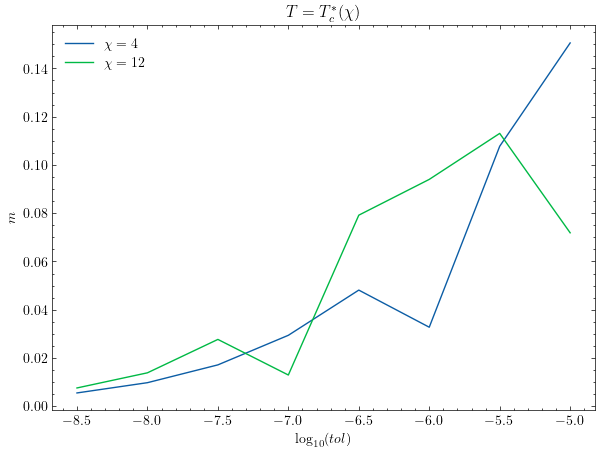

In [8]:
plt.figure(figsize=(7,5))
for folder in ["07-05 18:37", "07-05 18:44"]:
    mags = []
    for tol in tols:
        data = read(folder, f"tol{tol}")
        mags.extend(compute(Prop.m, data))

    log_tols = [np.log10(tol) for tol in tols]
    plt.plot(log_tols, mags, label=f"$\chi = {data['chi']}$")

plt.xlabel(r"$\log_{10}(tol)$")
plt.ylabel("$m$")
plt.legend(loc="best")
plt.title(r"$T = T_c^*(\chi)$")
plt.show()

In [11]:
chis = [20]
result = Results(varying_param= "chi", range=chis)
params = ModelParameters(var_range=(2.23, 2.3), step=0.0001, tol=1e-10, max_steps=int(10e9), use_prev=True)
result.get(params, sweeping_param="temperature")

chi=20: 100%|██████████| 700/700 [34:56<00:00,  2.99s/it]    


Saving data in folder: '04-06 23:19'
Done 



## Phase diagram

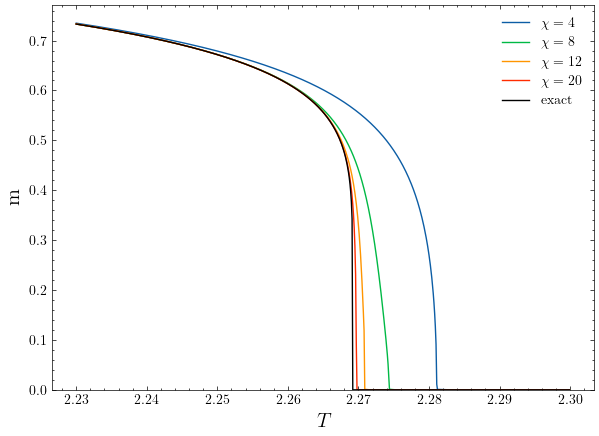

In [3]:
chis = [4, 8, 12]
plt.figure(figsize=(7, 5))
T_range = (2.23, 2.3)
for chi in chis:
    data = read('04-06 21:06', f"chi{chi}")
    plt.plot(data["temperatures"], compute(Prop.m, data), label = f"$\chi = {chi}$")

data = read('04-06 23:19', f"chi20")
plt.plot(data["temperatures"], compute(Prop.m, data), label = f"$\chi = 20$")

    
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="exact")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.show()

## Free energy

In [5]:
chis = [4, 8, 16]
result = Results(varying_param= "chi", range=chis)
params = ModelParameters(var_range=(0.5, 3.5), step=0.01, tol=1e-9, max_steps=int(10e9), use_prev=True)
result.get(params, sweeping_param="temperature")

chi=4: 100%|██████████| 300/300 [00:14<00:00, 20.78it/s]


Saving data in folder: '05-06 11:56'
Done 



chi=8: 100%|██████████| 300/300 [00:17<00:00, 17.03it/s]


Saving data in folder: '05-06 11:56'
Done 



chi=16: 100%|██████████| 300/300 [01:48<00:00,  2.76it/s]


Saving data in folder: '05-06 11:56'
Done 



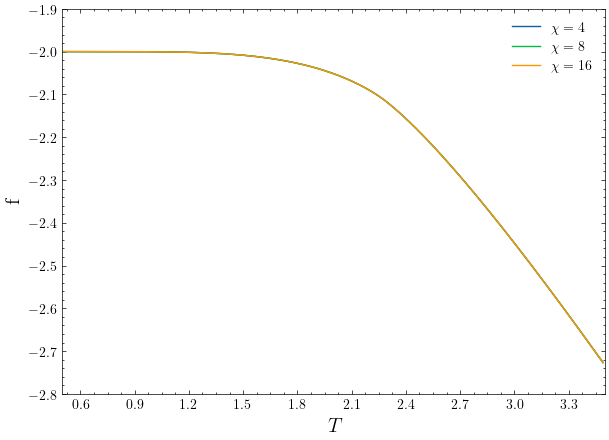

In [14]:
from matplotlib.ticker import MaxNLocator


plt.figure(figsize=(7, 5))
T_range = (1, 4)
#plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
for chi in chis:
    data = read('05-06 11:56', f"chi{chi}")
    plt.plot(data["temperatures"], compute(Prop.f, data), label = f"$\chi = {chi}$")

plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"f", fontsize=15)
plt.ylim(-2.8, -1.9)
plt.xlim(0.5, 3.5)
plt.show()

## Computational cost

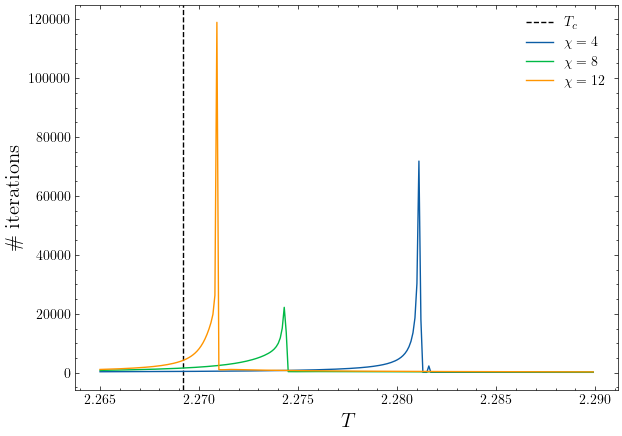

In [20]:
plt.figure(figsize=(7, 5))
T_range = (2.265, 4)
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
for chi in chis:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop="number of iterations", folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\#$ iterations", fontsize=15)
plt.savefig(f"{path_dir}/execution times")

In [14]:
result = Results(varying_param= "chi", range=chis)
params = ModelParameters(T_range=(2.23, 2.29), step=0.001, tol=1e-8, max_steps=int(10e9), use_prev=False)
result.get(params)

chi=4: 100%|██████████| 61/61 [01:07<00:00,  1.10s/it]


Saving data in folder: '07-05 21:04'
Done 



chi=8: 100%|██████████| 61/61 [01:12<00:00,  1.19s/it]


Saving data in folder: '07-05 21:04'
Done 



chi=12: 100%|██████████| 61/61 [02:09<00:00,  2.12s/it]

Saving data in folder: '07-05 21:04'
Done 



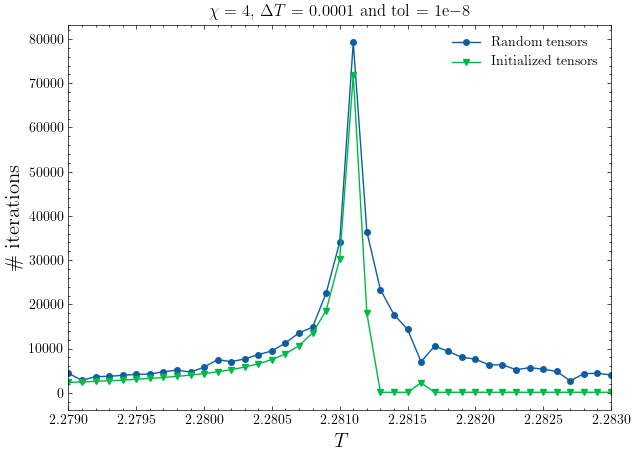

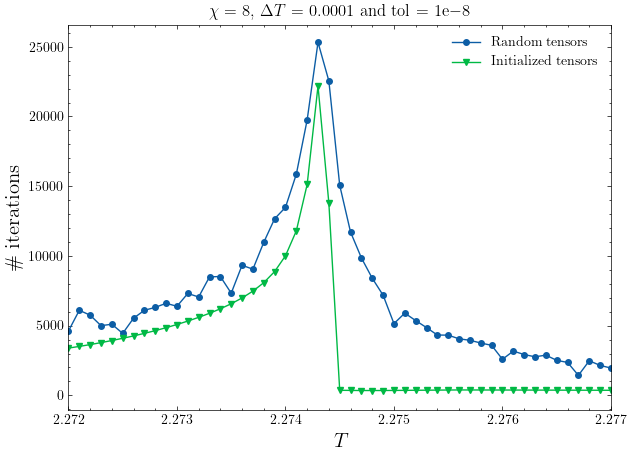

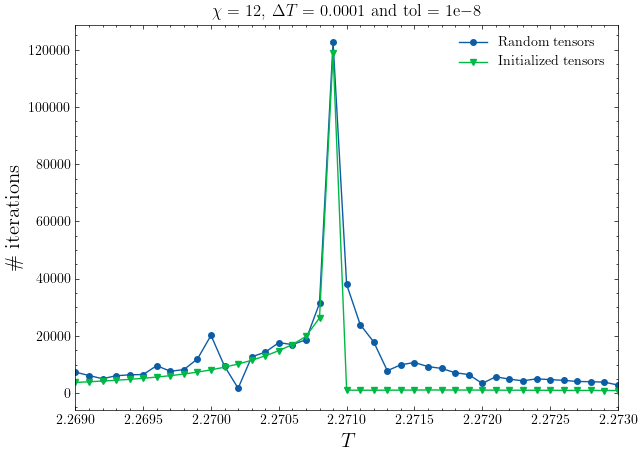

In [16]:
for chi in [4,8,12]:
    plt.figure(figsize=(7, 5))
    T_range = (2.265, 4)
    line = plot_file(fn=f"chi{chi}", range=T_range, prop="number of iterations", folder="07-05 19:38")
    line.set_label("Random tensors")
    line.set_marker("o")
    line.set_markersize(4)
    line = plot_file(fn=f"chi{chi}", range=T_range, prop="number of iterations", folder="07-05 16:56")
    line.set_label("Initialized tensors")
    line.set_marker("v")
    line.set_markersize(4)
    if chi == 12:
        plt.xlim(2.269, 2.273)
    if chi == 8:
        plt.xlim(2.272, 2.277)
    if chi == 4:
        plt.xlim(2.279, 2.283)
    plt.title(rf"$\chi$ = {chi}, $\Delta T$ = 0.0001 and tol = 1e$-$8")
    plt.legend()
    plt.xlabel(r"$T$", fontsize=15)
    plt.ylabel(r"$\#$ iterations", fontsize=15)
    plt.savefig(f"{path_dir}/execution times")

In [21]:
for chi in [4, 8, 12]:
    data_init = read("07-05 19:38", f"chi{chi}")
    data_random = read("01-05 17:46", f"chi{chi}")
    total_random = sum(data_random['number of iterations'])
    total_initialized = sum(data_init['number of iterations'])
    print(f"total number of iterations for chi={chi}")
    print(f"initialized: {total_initialized}")
    print(f"random: {total_random}")
    print(f"improvement: {round((total_random - total_initialized) / total_initialized * 100, 2)}%\n")


total number of iterations for chi=4
initialized: 867802
random: 1238401
improvement: 42.71%

total number of iterations for chi=8
initialized: 858703
random: 1106487
improvement: 28.86%

total number of iterations for chi=12
initialized: 1144752
random: 1343586
improvement: 17.37%



## Energy per site

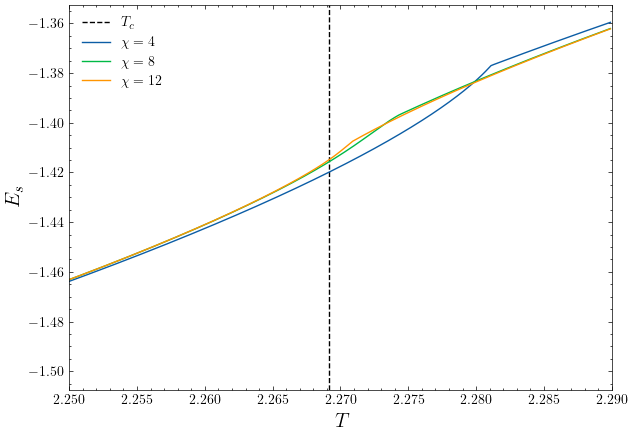

In [22]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2, 2.3)
for chi in chis:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.Es, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.xlim(2.25, 2.29)
plt.ylabel(r"$E_s$", fontsize=15)
plt.savefig(f"{path_dir}/energies per site")

## Specific heat

In [32]:
chis = [8]
result = Results(varying_param= "chi", range=chis)
params = ModelParameters(var_range=(2.23, 2.3), step=0.0001, tol=1e-10, max_steps=int(10e9), use_prev=True)
result.get(params, sweeping_param="temperature")

chi=8: 100%|██████████| 700/700 [11:48<00:00,  1.01s/it]  


Saving data in folder: '05-06 12:43'
Done 



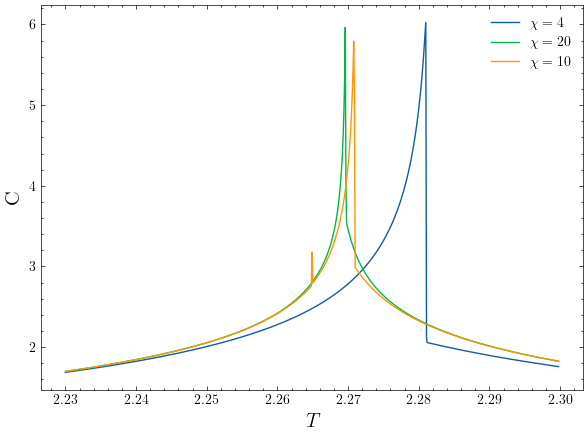

In [34]:
plt.figure(figsize=(7, 5))
T_range = (2.23, 2.3)
for chi in [4]:
    data = read('04-06 21:06', f"chi{chi}")
    energies = compute(Prop.Es, data)
    temps = data["temperatures"]
    heats = np.diff(energies) / np.diff(temps)
    plt.plot(temps[:-1], heats, label=f"$\chi={chi}$")


data = read('04-06 23:19', f"chi20")
energies = compute(Prop.Es, data)
temps = data["temperatures"]
heats = np.diff(energies) / np.diff(temps)
plt.plot(temps[:-1], heats, label=f"$\chi=20$")

data = read('05-06 12:24', f"chi10")
energies = compute(Prop.Es, data)
temps = data["temperatures"]
heats = np.diff(energies) / np.diff(temps)
plt.plot(temps[:-1], heats, label=f"$\chi=10$")

    
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"C", fontsize=15)
plt.show()

## Correlation length

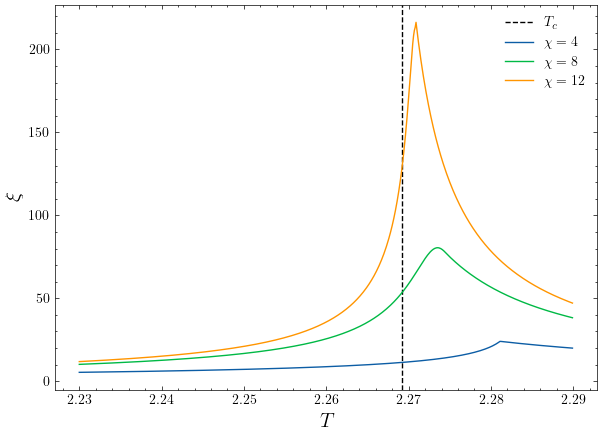

In [23]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")

chis = [4, 8, 12]
T_range = (2.23, 2.3)
for chi in chis:
    data = read('04-06 21:06', f"chi{chi}")
    plt.plot(data["temperatures"], compute(Prop.xi, data), label = f"$\chi = {chi}$")

data = read('04-06 23:19', f"chi20")
plt.plot(data["temperatures"], compute(Prop.xi, data), label = f"$\chi = 20$")

    
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="exact")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.show()

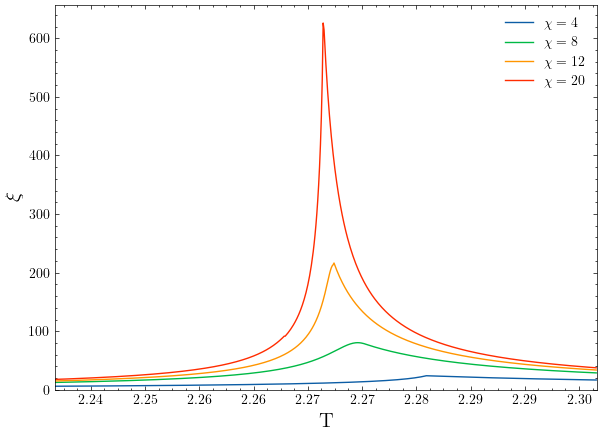

In [47]:
from matplotlib.ticker import FormatStrFormatter

chis = [4, 8, 12]
plt.figure(figsize=(7, 5))
T_range = (2.23, 2.3)
for chi in chis:
    data = read('04-06 21:06', f"chi{chi}")
    plt.plot(data["temperatures"], compute(Prop.xi, data), label = f"$\chi = {chi}$")

data = read('04-06 23:19', f"chi20")
plt.plot(data["temperatures"], compute(Prop.xi, data), label = f"$\chi = 20$")

    
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.legend()
plt.ylabel(r"$\xi$", fontsize=15)
plt.xlabel(r"T", fontsize=15)
plt.ylim(0)
plt.xlim(2.24, 2.3)
plt.show()

In [53]:
sizes = [8, 18, 38, 88]
result = Results(varying_param= "max_steps", range=sizes)
params = ModelParameters(var_range=(1, 2.3), step=0.001, tol=1e-10, use_prev=True, chi=32, b_c =True)
result.get(params, sweeping_param="temperature")

max_steps=8: 100%|██████████| 1300/1300 [00:15<00:00, 83.58it/s]


Saving data in folder: '05-06 14:47'
Done 



max_steps=18: 100%|██████████| 1300/1300 [00:45<00:00, 28.74it/s]


Saving data in folder: '05-06 14:47'
Done 



max_steps=38: 100%|██████████| 1300/1300 [01:37<00:00, 13.38it/s]


Saving data in folder: '05-06 14:47'
Done 



max_steps=88: 100%|██████████| 1300/1300 [02:51<00:00,  7.57it/s]


Saving data in folder: '05-06 14:47'
Done 

